In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import requests
import shutil
import tarfile
import os
 

File downloaded and saved to NotebookInputs/20200513_Mouse_PatchSeq_Release_cpm.csv.tar
File extracted to NotebookInputs/


In [5]:
##Download Mouse patch-seq data (originally downloaded from Nemo)
##The script below downloads and unzips the tar file programatically. If you would like to download the file manusally, you 
## you can download "20200513_Mouse_PatchSeq_Release_cpm.csv.tar" from https://data.nemoarchive.org/other/AIBS/AIBS_patchseq/transcriptome/scell/SMARTseq/processed/analysis/20200611/
##to the NotebookInputs folder and unzip to .csv format 

def download_file(url, save_path):
    with requests.get(url, stream=True) as response:
        response.raise_for_status()  # Check if the request was successful
        with open(save_path, 'wb') as file:
            shutil.copyfileobj(response.raw, file)
    print(f"File downloaded and saved to {save_path}")
 
def extract_tar_file(file_path, extract_to):
    with tarfile.open(file_path, 'r') as tar:
        tar.extractall(path=extract_to)
    print(f"File extracted to {extract_to}")
 
url = "https://data.nemoarchive.org/other/AIBS/AIBS_patchseq/transcriptome/scell/SMARTseq/processed/analysis/20200611/20200513_Mouse_PatchSeq_Release_cpm.csv.tar"
save_path = "NotebookInputs/20200513_Mouse_PatchSeq_Release_cpm.csv.tar"
extract_to = "NotebookInputs/"  
 
os.makedirs(extract_to, exist_ok=True)
 
download_file(url, save_path)
extract_tar_file(save_path, extract_to)

In [2]:
##import Mouse patch-seq data to df
tx_test = pd.read_csv("./NotebookInputs/20200513_Mouse_PatchSeq_Release_cpm/20200513_Mouse_PatchSeq_Release_cpm.csv")
tx_test = tx_test.set_index('Unnamed: 0').T
tx_test = tx_test.reset_index()
tx_test = tx_test.rename(columns = {"index":"transcriptomics_sample_id"})


###csv with MET-labels
metadata_df = pd.read_csv("./NotebookInputs/20200711_patchseq_metadata_mouse.csv")
##select only sst met 4,6,8 data and relevant columns
metadata_met = metadata_df[metadata_df['MET-type Label'].str.contains('Sst-MET-4|Sst-MET-6|Sst-MET-8', na =False)]
meta_sst_468_sub = metadata_met[['cell_specimen_id', 'transcriptomics_sample_id','MET-type Label', 'T-type Label']]


     T-type Label  cell_specimen_id  transcriptomics_sample_id  MET-type Label
0  Sst Hpse Cbln4                18                         18              18


([<matplotlib.patches.Wedge at 0x2a71e3d7f10>],
 [Text(0.842648887430876, 0.7070663706551933, 'Sst Hpse Cbln4')])

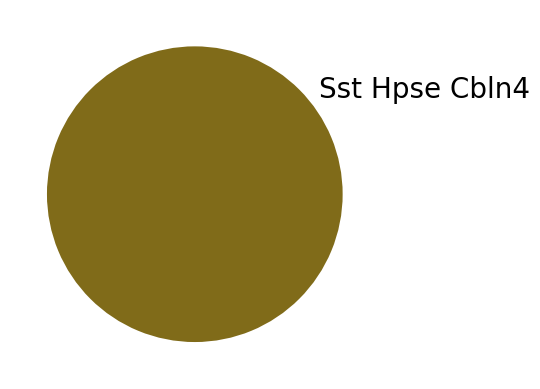

In [3]:
met8 = meta_sst_468_sub.loc[meta_sst_468_sub['MET-type Label'] == 'Sst-MET-8']
met4 = meta_sst_468_sub.loc[meta_sst_468_sub['MET-type Label'] == 'Sst-MET-4']
met6 = meta_sst_468_sub.loc[meta_sst_468_sub['MET-type Label'] == 'Sst-MET-6']
met8_group = met8.groupby('T-type Label').count().reset_index()
met4_group = met4.groupby('T-type Label').count().reset_index()
met6_group = met6.groupby('T-type Label').count().reset_index()
print (met8_group)
colors = ['#806B19']
color_red = ['#BF1F20']
afont = {'fontname':'Arial'}
plt.pie(met8_group['cell_specimen_id'], labels = met8_group['T-type Label'], startangle = 220, colors = colors, wedgeprops={'alpha':1}, textprops={'fontsize': 20}, radius = 1)
# plt.savefig('met8_ttype_pie_plot_aug2024.pdf', bbox_inches = 'tight')

       T-type Label  cell_specimen_id  transcriptomics_sample_id  \
0  Sst Calb2 Necab1                 3                          3   
1  Sst Calb2 Pdlim5                11                         11   
2  Sst Nr2f2 Necab1                 1                          1   

   MET-type Label  
0               3  
1              11  
2               1  


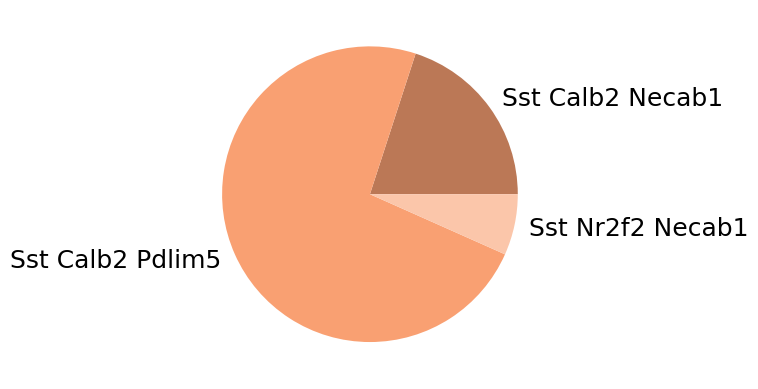

In [6]:
print (met4_group)
afont = {'fontname':'Arial'}
met4_colors = ['#bb7856', '#F9A072', '#FBC6AA']
met_color = ['#f9a072']
plt.pie(met4_group['cell_specimen_id'],startangle = 0, labels = met4_group['T-type Label'], colors= met4_colors, wedgeprops={'alpha':1}, textprops={'fontsize': 18}, radius = 1)
plt.savefig('met4_ttype_pie_plot_aug2024.pdf', bbox_inches = 'tight')

       T-type Label  cell_specimen_id  transcriptomics_sample_id  \
0  Sst Chrna2 Glra3                 7                          7   
1  Sst Chrna2 Ptgdr                 3                          3   
2    Sst Myh8 Etv1                  8                          8   

   MET-type Label  
0               7  
1               3  
2               8  


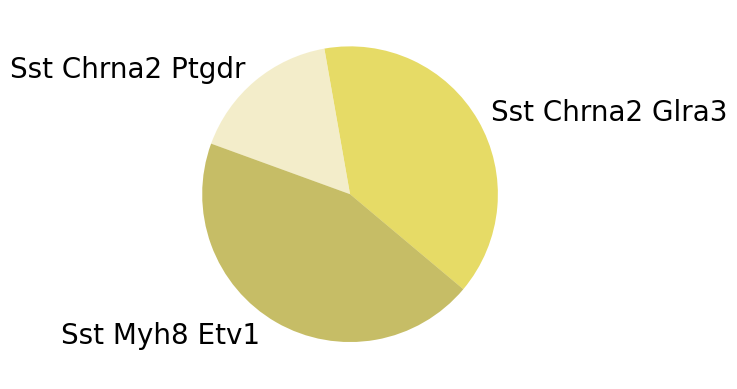

In [7]:
print (met6_group)
colors = ['#FF9F2C', '#FFB307', '#D6C300']
met_color = ['#D6C300']
met6_colors = ['#D6C300', '#ECE2A8', '#A19200' ]
plt.pie(met6_group['cell_specimen_id'],  labels = met6_group['T-type Label'], startangle = -40, colors = met6_colors, wedgeprops={'alpha':0.6}, textprops={'fontsize': 20}, radius = 1)

plt.savefig('met6_ttype_pie_plot_aug2024.pdf', bbox_inches = 'tight')

In [8]:

SUBCLASS_MARKER_GENES = {
    "Sst": [
        "Sst",

## GO analysis from Nathan
        #8 greater than 4 and 6
        "Hpse",
        "Syt6",
#         "Gm35522", 
        "Clstn2",
#         "Ascl2",
        "Ptprd",

    # 8 less than 4 and 6 
        "Calb2",
        "Pcdh8",
        "Pcsk5",
        "Mrap2",
        "Zbtb20",
        "Nr2f2",
        "Gpx3",
        "Cartpt",
        "Cdh12",
        "Zmat4",
        
        # 4 vs 6
        "Olfm3",
        "Sfrp2",
        "Mgat4c"
        
    ]}
subclass = "Sst"

In [9]:
genes = SUBCLASS_MARKER_GENES[subclass]
tx_data = tx_test.filter(items = ['transcriptomics_sample_id'] + genes)
print (tx_data.head())
tx_data2 = tx_data.merge(meta_sst_468_sub, how = 'inner', on = 'transcriptomics_sample_id')
tx_data2['met_type'] = tx_data2['MET-type Label']
tx_data2_sub = tx_data2.loc[(tx_data2['MET-type Label'] =='Sst-MET-8')| (tx_data2['MET-type Label'] =='Sst-MET-4')| (tx_data2['MET-type Label'] =='Sst-MET-6')]
tx_data2_sub_mean = tx_data2_sub.groupby('met_type').mean()
print (tx_data2_sub_mean)
# tx_data2_sub_mean.to_csv('Nathan_mean_gene_expression.csv')

Unnamed: 0 transcriptomics_sample_id          Sst        Hpse       Syt6  \
0                   PS0810_E1-50_S88     0.000000    0.000000   0.000000   
1                   PS0817_E1-50_S19  6453.634582    0.000000  47.599026   
2                   PS0817_E1-50_S25  4988.251445    0.000000   0.000000   
3                   PS0817_E1-50_S26   998.015247  693.536019   0.000000   
4                   PS0817_E1-50_S27   599.662244    0.000000   0.000000   

Unnamed: 0      Clstn2        Ptprd       Calb2       Pcdh8       Pcsk5  \
0           813.573077  2050.163577  540.691334    0.000000  105.500748   
1           115.030979     3.966585    0.000000    0.000000    0.000000   
2           219.170448  1337.109634  205.578483  433.243910    0.000000   
3           319.515239   261.250695    0.000000    0.000000    0.000000   
4           126.415284   447.315620    0.000000   81.035438  178.277965   

Unnamed: 0      Mrap2      Zbtb20  Nr2f2  Gpx3  Cartpt       Cdh12  \
0            0.000000 

C:\Users\clare.gamlin\AppData\Local\Temp\ipykernel_7276\3426369578.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tx_data2_sub_mean = tx_data2_sub.groupby('met_type').mean()


In [10]:
###Code adapted from Nathan Gouwens
def gene_dot_plot(df, column, genes, order, ax, expression_threshold=0, scatter_factor=8):
    total_counts = df.groupby(column).count()

    for i, gene in enumerate(genes):
        df_above_thresh = df.loc[df[gene] > expression_threshold, :]
        above_thresh_counts = df_above_thresh.groupby(column).count()
        max_val = df[gene].max()
        above_thresh_median = np.log2(df_above_thresh.groupby(column).median().fillna(0) + 1)

        above_thresh_fraction = (above_thresh_counts / total_counts).fillna(0)
        print (scatter_factor * above_thresh_fraction[gene].reindex(order, fill_value=0))

        scp = ax.scatter(x=range(len(order)), y=[i] * len(order),
            s=scatter_factor * above_thresh_fraction[gene].reindex(order, fill_value=0),
            c=above_thresh_median[gene].reindex(order, fill_value=0),
            edgecolors="darkgray", linewidths=0.25,
            vmin=0, vmax=np.log2(max_val + 1),
#             cmap="RdBu")
            cmap="RdYlBu_r")
        if i % 2 == 0:
            bg_color="#eeeded"
            ax.axhspan(i - 0.5, i + 0.5, color=bg_color, zorder=-1, lw=0)
    ax.set_yticks(range(len(genes)))
    ax.set_yticklabels(genes, fontsize=9)
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels([t.split("-")[-1] for t in order], rotation=0, fontsize=9)
    print (order)
    ax.set_ylim(-0.5, len(genes) - 0.5)
    ax.set_xlim(-0.5, len(order) - 0.5)

    ax.tick_params("both", length=0, width=0)
#     plt.colorbar(scp, ax = ax, ticks = (0,1, 2,3,4,5,6,7, 7.5))
    plt.colorbar(scp, ax = ax, ticks = (0, 2, 4, 6, 8, 10, 12, 13.2))

    ax.invert_yaxis()
    sns.despine(ax=ax, left=True, bottom=True)

 
    return ax



C:\Users\clare.gamlin\AppData\Local\Temp\ipykernel_7276\405884488.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  above_thresh_median = np.log2(df_above_thresh.groupby(column).median().fillna(0) + 1)
C:\Users\clare.gamlin\AppData\Local\Temp\ipykernel_7276\405884488.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  above_thresh_median = np.log2(df_above_thresh.groupby(column).median().fillna(0) + 1)
C:\Users\clare.gamlin\AppData\Local\Temp\ipykernel_7276\405884488.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will 

met_type
Sst-MET-8    100.0
Sst-MET-4    100.0
Sst-MET-6    100.0
Name: Sst, dtype: float64
met_type
Sst-MET-8    100.000000
Sst-MET-4     21.428571
Sst-MET-6      5.555556
Name: Hpse, dtype: float64
met_type
Sst-MET-8    82.352941
Sst-MET-4    14.285714
Sst-MET-6    11.111111
Name: Syt6, dtype: float64
met_type
Sst-MET-8    100.000000
Sst-MET-4     78.571429
Sst-MET-6     66.666667
Name: Clstn2, dtype: float64
met_type
Sst-MET-8    100.000000
Sst-MET-4    100.000000
Sst-MET-6     88.888889
Name: Ptprd, dtype: float64
met_type
Sst-MET-8     47.058824
Sst-MET-4    100.000000
Sst-MET-6     11.111111
Name: Calb2, dtype: float64
met_type
Sst-MET-8      0.000000
Sst-MET-4    100.000000
Sst-MET-6      5.555556
Name: Pcdh8, dtype: float64
met_type
Sst-MET-8     23.529412
Sst-MET-4    100.000000
Sst-MET-6     11.111111
Name: Pcsk5, dtype: float64
met_type
Sst-MET-8    17.647059
Sst-MET-4    85.714286
Sst-MET-6     5.555556
Name: Mrap2, dtype: float64
met_type
Sst-MET-8     70.588235
Sst-MET-4 

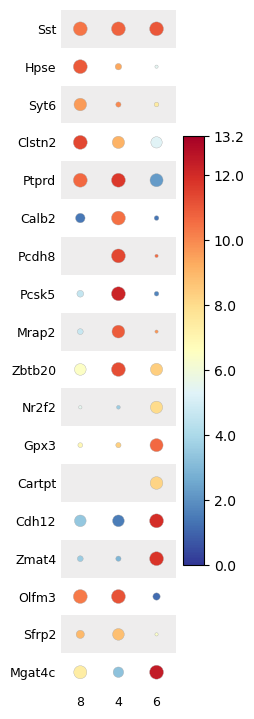

In [11]:

order_846 = ['Sst-MET-8','Sst-MET-4', 'Sst-MET-6']
met_types = [8,4,6]
fig = plt.figure(figsize=(8, 32))
g_main = gridspec.GridSpec(2, 1, height_ratios=(1.8, 1), hspace=0.125, wspace = 0.125)

# Customize layouts per subclass
subclass = "Sst"
g_sst = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=g_main[0],
    height_ratios=(0.8, 1),
#     width_ratios=(1.7, 1),
    wspace=0.1,
    hspace=0.1,
)
g_sst_other = gridspec.GridSpecFromSubplotSpec(
    1, 4,
    subplot_spec=g_sst[1],
    width_ratios=(1, 1, 0.2, 1),

    hspace=0.1,
    wspace=0.1,
)
g_genes = gridspec.GridSpecFromSubplotSpec(
    2, 5,
    height_ratios=(0.95, 0.05),
    subplot_spec=g_sst_other[1],
)

ax = plt.subplot(g_genes[0, 1:])
scatter_factor = 100
gene_dot_plot(tx_data2_sub, "met_type", genes, order_846, ax, scatter_factor=scatter_factor)

plt.savefig('met846_DEanalysis_gene_dot_plot_RedblueFromNemoData_090324_RdYlBu_gr50per_r150.pdf', facecolor = 'white', bbox_inches = 'tight')